# Airports

In [2]:
import pandas as pd 
airports = pd.read_csv('../data/airports (1).csv')
us_airports = airports[airports['iso_country'] == 'US']
airports = us_airports[us_airports['type'].apply(lambda x: x=='large_airport' or x == 'medium_airport')]
# airports.to_csv('us_large_airports.csv')

# Flights

In [3]:
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline

In [4]:
flights = pd.read_csv('../data/Airports2.csv')

In [5]:
flights = flights.sort_values('Fly_date')

In [6]:
flights['Fly_date'] = pd.to_datetime(flights['Fly_date'])
flights['year'] = flights['Fly_date'].apply(lambda x: x.year)
flights['month'] = flights['Fly_date'].apply(lambda x: x.month)

In [7]:
# flights['year'].hist();
# plt.figure()
# flights['month'].hist();

In [8]:
# flights['Fly_date'].value_counts().sort_index().plot();

In [9]:
# airports['ident'].apply(lambda x: 'SEA' in x).sum()

In [12]:
cols = ['Origin_airport', 'Destination_airport', 'Origin_city', 'Destination_city', 'Fly_date', 'year', 'month']
flights2 = flights[cols]

In [13]:
cols = ['iata_code', 'name', 'latitude_deg', 'longitude_deg']
airports2 = airports[cols]

In [14]:
airports2.columns = ['Origin_airport', 'name', 'origin_latitude', 'origin_longitude']
merged = pd.merge(flights2, airports2, on='Origin_airport')
print(merged.shape, flights2.shape)
airports2.columns = ['Destination_airport', 'name', 'destination_latitude', 'destination_longitude']
merged = pd.merge(merged, airports2, on='Destination_airport')
print(merged.shape, flights2.shape)

(3591436, 10) (3606803, 7)
(3577607, 13) (3606803, 7)


In [15]:
merged = merged.sort_values(['month', 'year'])

In [18]:
merged.sample(frac=0.1).to_csv('flights_10pct_latlng.csv')

In [133]:
merged.to_csv('merged.csv')

In [139]:
merged.shape, merged.drop_duplicates().shape

((3577607, 13), (1134233, 13))

In [140]:
merged2 = merged[['year', 'month', 'origin_latitude', 'origin_longitude', 'destination_latitude', 'destination_longitude']]

In [143]:
merged2 = merged2.drop_duplicates()
merged2.to_csv('merged.csv')

In [178]:
merged['epoch'] = merged['Fly_date'].astype(int)/100000000000

In [179]:
merged[['Origin_airport', 'Destination_airport', 'epoch']]

,Origin_airport,Destination_airport,epoch
0,SEA,ORD,6311520.0
1,SEA,ORD,6311520.0
2,SEA,ORD,6311520.0
3,SEA,ORD,6311520.0
4,SEA,ORD,6311520.0
...,...,...,...
3577602,YIP,GUS,12334464.0
3577603,YIP,GUS,12358656.0
3577604,YIP,GUS,12385440.0
3577605,SUS,GUS,12148704.0


In [173]:
unique_flights = merged[['Origin_airport', 'Destination_airport']].drop_duplicates()
unique_flights = unique_flights.sort_values(['Origin_airport', 'Destination_airport'])
unique_flights = unique_flights.apply(lambda x: '%s > %s' % (x['Origin_airport'], x['Destination_airport']), axis=1)

In [185]:
len(set(merged['epoch'])), unique_flights.shape

(240, (34185,))

In [189]:
unique_epochs = sorted(merged['epoch'].unique())

In [199]:
merged

,Origin_airport,Destination_airport,Origin_city,Destination_city,Fly_date,year,month,name_x,origin_latitude,origin_longitude,name_y,destination_latitude,destination_longitude,epoch
0,SEA,ORD,"Seattle, WA","Chicago, IL",1990-01-01,1990,1,Seattle–Tacoma International Airport,47.449162,-122.311134,Chicago O'Hare International Airport,41.978600,-87.904800,6311520.0
1,SEA,ORD,"Seattle, WA","Chicago, IL",1990-01-01,1990,1,Seattle–Tacoma International Airport,47.449162,-122.311134,Chicago O'Hare International Airport,41.978600,-87.904800,6311520.0
2,SEA,ORD,"Seattle, WA","Chicago, IL",1990-01-01,1990,1,Seattle–Tacoma International Airport,47.449162,-122.311134,Chicago O'Hare International Airport,41.978600,-87.904800,6311520.0
3,SEA,ORD,"Seattle, WA","Chicago, IL",1990-01-01,1990,1,Seattle–Tacoma International Airport,47.449162,-122.311134,Chicago O'Hare International Airport,41.978600,-87.904800,6311520.0
4,SEA,ORD,"Seattle, WA","Chicago, IL",1990-01-01,1990,1,Seattle–Tacoma International Airport,47.449162,-122.311134,Chicago O'Hare International Airport,41.978600,-87.904800,6311520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577602,YIP,GUS,"Detroit, MI","Peru, IN",2009-02-01,2009,2,Willow Run Airport,42.237900,-83.530403,Grissom Air Reserve Base,40.648102,-86.152100,12334464.0
3577603,YIP,GUS,"Detroit, MI","Peru, IN",2009-03-01,2009,3,Willow Run Airport,42.237900,-83.530403,Grissom Air Reserve Base,40.648102,-86.152100,12358656.0
3577604,YIP,GUS,"Detroit, MI","Peru, IN",2009-04-01,2009,4,Willow Run Airport,42.237900,-83.530403,Grissom Air Reserve Base,40.648102,-86.152100,12385440.0
3577605,SUS,GUS,"St. Louis, MO","Peru, IN",2008-07-01,2008,7,Spirit of St Louis Airport,38.662102,-90.652000,Grissom Air Reserve Base,40.648102,-86.152100,12148704.0


In [201]:
result = pd.DataFrame(0, index=unique_flights, columns=unique_epochs)

for _, row in tqdm(merged[['Origin_airport', 'Destination_airport', 'epoch']].iterrows(), total=merged.shape[0]):
    idx = "%s > %s" % (row['Origin_airport'], row['Destination_airport'])
    result.loc[idx, row['epoch']] = 1

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3577607/3577607 [03:09<00:00, 18882.34it/s]


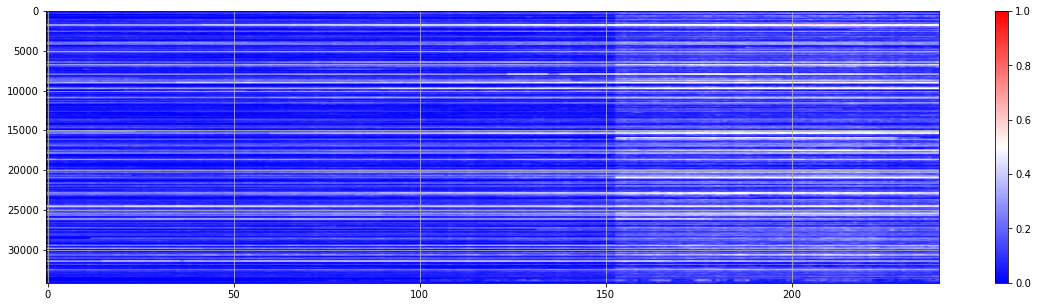

In [213]:
plt.figure(figsize=(20, 5))
plt.imshow(result, aspect='auto', cmap='bwr');
plt.colorbar();
plt.grid()

In [214]:
result.shape

(34185, 240)